In [20]:
# Sentiment Analysis on Women’s Fashion Reviews
#This project performs sentiment analysis on customer reviews from a women's fashion e-commerce dataset using NLP and machine learning techniques.

import pandas as pd
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [21]:
df = df[['Review Text', 'Rating']]
df = df.dropna()

df['sentiment'] = df['Rating'].apply(
    lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral'
)

df = df[df['sentiment'] != 'neutral']
df.head()


,Review Text,Rating,sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,positive
1,Love this dress! it's sooo pretty. i happene...,5,positive
3,"I love, love, love this jumpsuit. it's fun, fl...",5,positive
4,This shirt is very flattering to all due to th...,5,positive
5,"I love tracy reese dresses, but this one is no...",2,negative


In [22]:
## Data Cleaning & Text Preprocessing

#We clean the review text by lowercasing, removing punctuation, and normalizing whitespace to prepare it for vectorization.

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [23]:
df['clean_review'] = df['Review Text'].apply(clean_text)
df.head()


,Review Text,Rating,sentiment,clean_review
0,Absolutely wonderful - silky and sexy and comf...,4,positive,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,5,positive,love this dress its sooo pretty i happened to ...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,positive,i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,5,positive,this shirt is very flattering to all due to th...
5,"I love tracy reese dresses, but this one is no...",2,negative,i love tracy reese dresses but this one is not...


In [24]:
print(df.shape)

(19818, 4)


In [25]:
X = df['clean_review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})


In [26]:
y.value_counts()


sentiment
1    17448
0     2370
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [30]:
y_pred = model.predict(X_test_tfidf)


In [31]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9268415741675076
              precision    recall  f1-score   support

           0       0.86      0.46      0.60       474
           1       0.93      0.99      0.96      3490

    accuracy                           0.93      3964
   macro avg       0.90      0.73      0.78      3964
weighted avg       0.92      0.93      0.92      3964



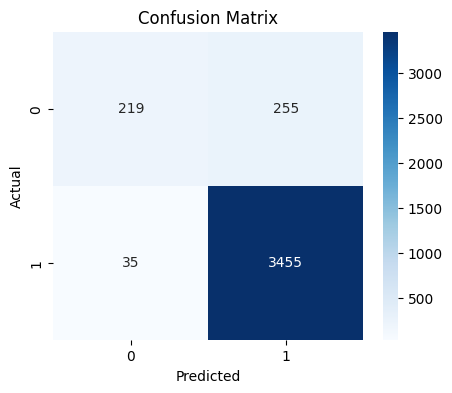

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [33]:
sample_review = ["The dress fits beautifully and the fabric feels premium"]
sample_clean = [clean_text(sample_review[0])]
sample_vector = vectorizer.transform(sample_clean)

prediction = model.predict(sample_vector)
print("Sentiment:", "Positive" if prediction[0] == 1 else "Negative")

Sentiment: Positive


In [34]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

word_importance = pd.DataFrame({'word': feature_names, 'coefficient': coefficients})

# Top 10 Positive and Top 10 Negative words
top_positive = word_importance.sort_values(by='coefficient', ascending=False).head(10)
top_negative = word_importance.sort_values(by='coefficient', ascending=True).head(10)

print("Top 10 Positive Words:", top_positive['word'].values)
print("Top 10 Negative Words:", top_negative['word'].values)

Top 10 Positive Words: ['love' 'little' 'comfortable' 'great' 'perfect' 'soft' 'fits' 'bit'
 'compliments' 'nice']
Top 10 Negative Words: ['disappointed' 'cheap' 'wanted love' 'unflattering' 'returned' 'huge'
 'return' 'way' 'returning' 'awful']
